In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder



In [2]:
df=pd.read_csv('/content/fraud_data - Sheet 1.csv')

In [3]:
df.head()

,TransactionID,Amount,Time,Location,MerchantCategory,CardHolderAge,IsFraud
0,28,514.72,23833,Chicago,Electronics,52.0,1
1,47,312.40,9860,Miami,Electronics,52.0,1
2,50,185.67,23574,Houston,Entertainment,37.0,1
3,53,939.56,10916,New York,Entertainment,42.0,1
4,89,NaN,39764,New York,Clothing,NaN,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TransactionID     500 non-null    int64  
 1   Amount            475 non-null    float64
 2   Time              500 non-null    int64  
 3   Location          475 non-null    object 
 4   MerchantCategory  500 non-null    object 
 5   CardHolderAge     476 non-null    float64
 6   IsFraud           500 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 27.5+ KB


In [5]:
df.describe()

,TransactionID,Amount,Time,CardHolderAge,IsFraud
count,500.000000,475.000000,500.000000,476.000000,500.000000
mean,250.500000,641.112753,41141.482000,47.518908,0.054000
std,144.481833,1044.448065,25614.468967,18.677362,0.226244
min,1.000000,6.060000,55.000000,5.000000,0.000000
25%,125.750000,243.780000,18726.250000,32.000000,0.000000
50%,250.500000,518.810000,40772.000000,47.000000,0.000000
75%,375.250000,776.000000,63463.250000,63.000000,0.000000
max,500.000000,9691.578643,86066.000000,120.000000,1.000000


In [6]:
df.shape

(500, 7)

In [7]:
df.isnull().sum()

,0
TransactionID,0
Amount,25
Time,0
Location,25
MerchantCategory,0
CardHolderAge,24
IsFraud,0


In [8]:
df['Amount'].fillna(df['Amount'].median(), inplace=True)


/tmp/ipython-input-2960511860.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(df['Amount'].median(), inplace=True)


In [9]:
df['Location'].fillna('Unknown', inplace=True)


/tmp/ipython-input-2244031345.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].fillna('Unknown', inplace=True)


In [10]:
df['CardHolderAge'].fillna(df['CardHolderAge'].median(), inplace=True)


/tmp/ipython-input-72592784.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CardHolderAge'].fillna(df['CardHolderAge'].median(), inplace=True)


In [11]:
df.isnull().sum()


,0
TransactionID,0
Amount,0
Time,0
Location,0
MerchantCategory,0
CardHolderAge,0
IsFraud,0


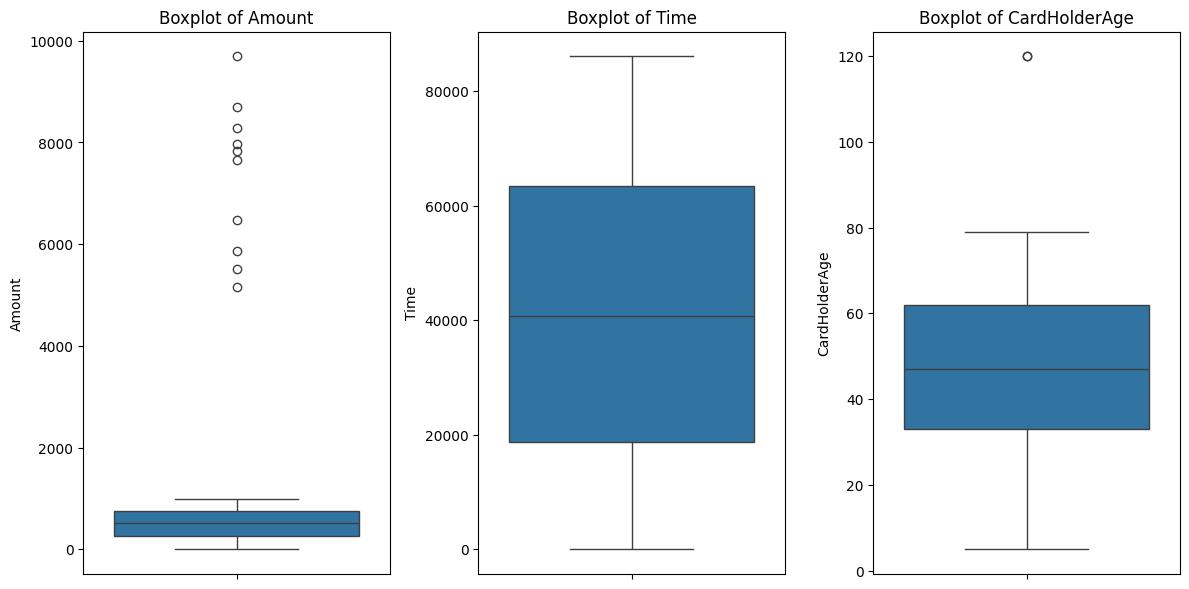

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns
num_cols = ['Amount', 'Time', 'CardHolderAge']

plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [13]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

for col in num_cols:
    outliers = detect_outliers(df, col)
    print(f"{col}: {len(outliers)} outliers")


Amount: 10 outliers
Time: 0 outliers
CardHolderAge: 2 outliers


In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode Location and MerchantCategory if still strings
for col in ['Location', 'MerchantCategory']:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])



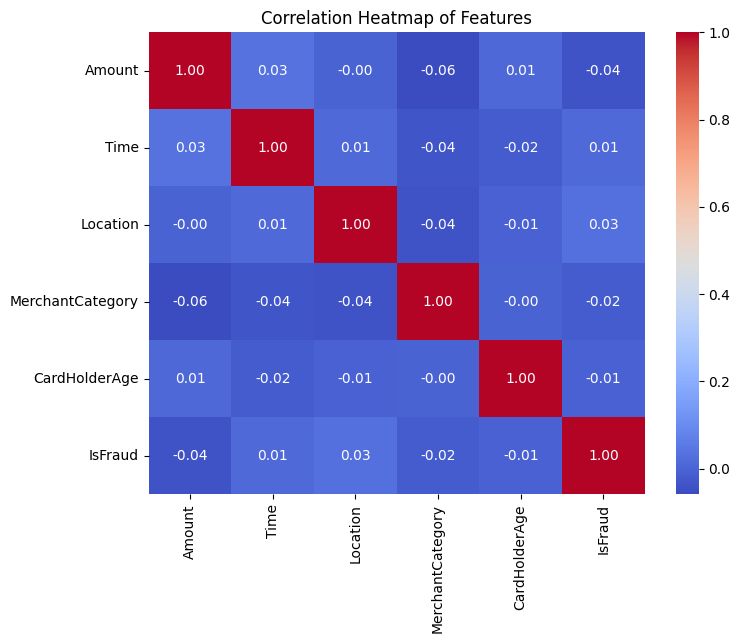

In [15]:
plt.figure(figsize=(8,6))
corr = df.drop(columns=['TransactionID']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical features
for col in ['Location', 'MerchantCategory']:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Features & target
X = df.drop(columns=['TransactionID','IsFraud'])
y = df['IsFraud']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (400, 5) Test size: (100, 5)


In [17]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with class balancing (important for fraud detection)
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:,1]  # probability of fraud



In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]



In [19]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("📌 Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

print("\n📌 Random Forest")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))


📌 Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.51      0.67        95
           1       0.08      0.80      0.14         5

    accuracy                           0.52       100
   macro avg       0.53      0.65      0.40       100
weighted avg       0.93      0.52      0.64       100

ROC-AUC: 0.5557894736842105

📌 Random Forest
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        95
           1       0.00      0.00      0.00         5

    accuracy                           0.95       100
   macro avg       0.47      0.50      0.49       100
weighted avg       0.90      0.95      0.93       100

ROC-AUC: 0.4557894736842105

Confusion Matrix (Random Forest):
[[95  0]
 [ 5  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


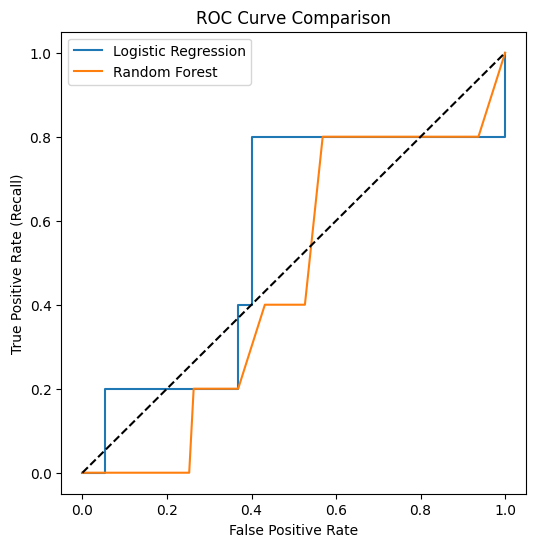

In [20]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6,6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()



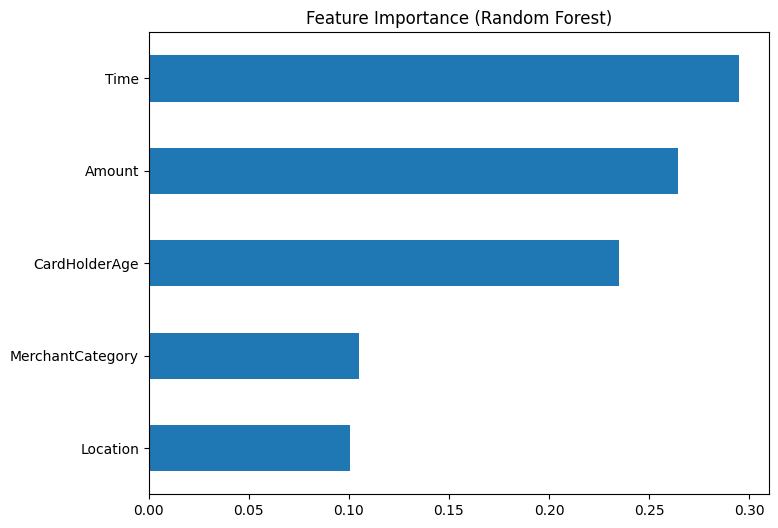

In [21]:
import pandas as pd

feat_importance = pd.Series(rf.feature_importances_, index=X.columns)
feat_importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance (Random Forest)")
plt.show()



In [22]:
# Robust ColumnTransformer + pipeline that handles sklearn version differences
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import inspect, sklearn, numpy as np

print("scikit-learn version:", sklearn.__version__)

# define categorical and numeric features (adjust if your column names differ)
categorical = ['Location', 'MerchantCategory']
exclude = set(categorical + ['TransactionID', 'IsFraud'])
numeric = [c for c in df.columns if c not in exclude]

# Build OneHotEncoder with the correct keyword depending on sklearn version
ohe_kwargs = {'handle_unknown': 'ignore'}
sig = inspect.signature(OneHotEncoder)
if 'sparse' in sig.parameters:
    # older sklearns
    ohe_kwargs['sparse'] = False
elif 'sparse_output' in sig.parameters:
    # newer sklearn (>= around 1.2) uses sparse_output
    ohe_kwargs['sparse_output'] = False
# else: fallback to leaving default (sparse) - but above covers common cases

ohe = OneHotEncoder(**ohe_kwargs)

# ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric),
    ('cat', ohe, categorical)
], remainder='drop')   # change remainder if you want to keep extra cols

# pipeline
pipe_lr = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# Train/test split (raw X, pipeline handles scaling/encoding)
X = df.drop(columns=['TransactionID', 'IsFraud'])
y = df['IsFraud']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Fit
pipe_lr.fit(X_train_raw, y_train)

# Quick checks
Xtr_trans = pipe_lr.named_steps['pre'].transform(X_train_raw)
print("Transformed training shape:", getattr(Xtr_trans, "shape", None))
y_pred = pipe_lr.predict(X_test_raw)
y_prob = pipe_lr.predict_proba(X_test_raw)[:,1]
print("Done. Sample predicted probs (first 5):", y_prob[:5])



scikit-learn version: 1.6.1
Transformed training shape: (400, 14)
Done. Sample predicted probs (first 5): [0.45594069 0.28591411 0.49814604 0.37243396 0.39271091]


              precision    recall  f1-score   support

           0       0.96      0.54      0.69        95
           1       0.06      0.60      0.12         5

    accuracy                           0.54       100
   macro avg       0.51      0.57      0.40       100
weighted avg       0.92      0.54      0.66       100

ROC AUC: 0.5536842105263158


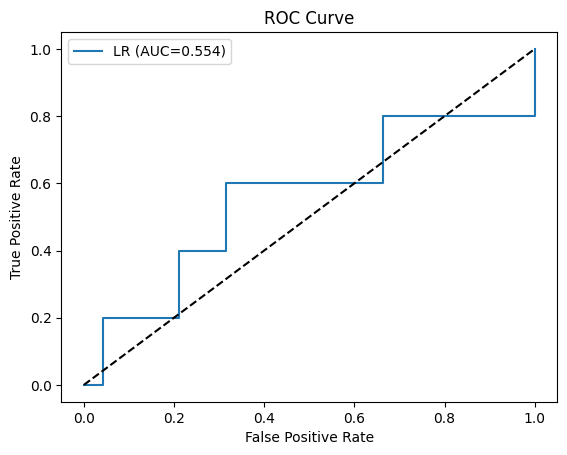

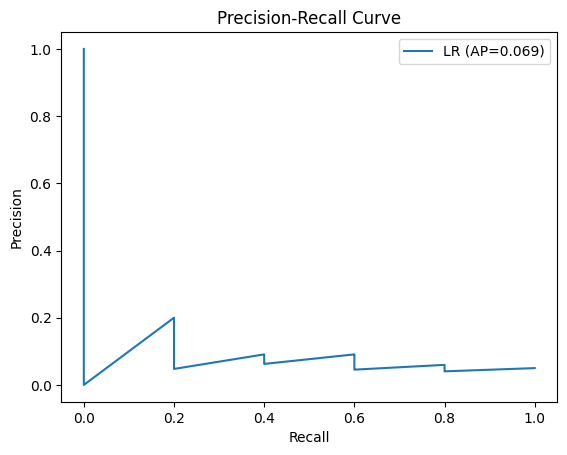

In [23]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"LR (AUC={roc_auc_score(y_test, y_prob):.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve"); plt.legend(); plt.show()

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_prob)
plt.plot(rec, prec, label=f"LR (AP={auc(rec, prec):.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall Curve"); plt.legend(); plt.show()


Random Forest + SMOTE

Random Forest Results
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        95
           1       0.00      0.00      0.00         5

    accuracy                           0.94       100
   macro avg       0.47      0.49      0.48       100
weighted avg       0.90      0.94      0.92       100

ROC AUC: 0.31894736842105265


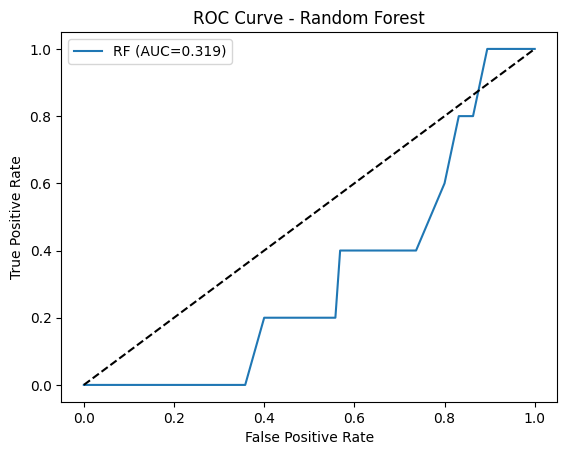

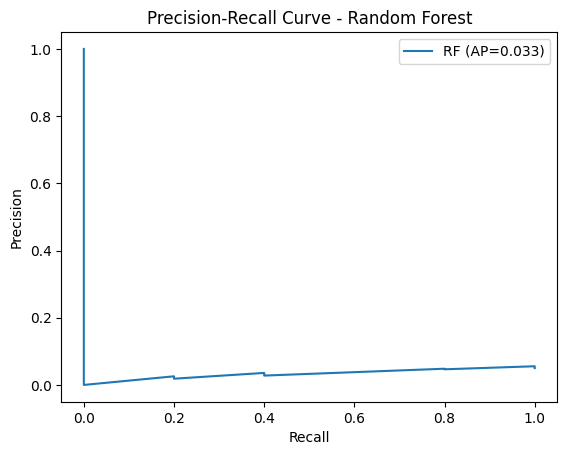

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline

# Build pipeline with preprocessing + SMOTE + RandomForest
pipe_rf = ImbPipeline([
    ('pre', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

pipe_rf.fit(X_train_raw, y_train)
y_pred_rf = pipe_rf.predict(X_test_raw)
y_prob_rf = pipe_rf.predict_proba(X_test_raw)[:,1]

print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f"RF (AUC={roc_auc_score(y_test, y_prob_rf):.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest"); plt.legend(); plt.show()

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_prob_rf)
plt.plot(rec, prec, label=f"RF (AP={auc(rec, prec):.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest"); plt.legend(); plt.show()


In [25]:
from sklearn.metrics import f1_score

thresholds = np.linspace(0.1, 0.9, 9)
f1_scores = []

for thr in thresholds:
    y_pred_thr = (y_prob >= thr).astype(int)
    f1 = f1_score(y_test, y_pred_thr)
    f1_scores.append(f1)
    print(f"Threshold={thr:.2f} → F1={f1:.3f}")

best_thr = thresholds[np.argmax(f1_scores)]
print("Best threshold:", best_thr)

# Evaluate at best threshold
y_pred_best = (y_prob >= best_thr).astype(int)
print(classification_report(y_test, y_pred_best))


Threshold=0.10 → F1=0.095
Threshold=0.20 → F1=0.095
Threshold=0.30 → F1=0.080
Threshold=0.40 → F1=0.098
Threshold=0.50 → F1=0.115
Threshold=0.60 → F1=0.105
Threshold=0.70 → F1=0.000
Threshold=0.80 → F1=0.000
Threshold=0.90 → F1=0.000
Best threshold: 0.5
              precision    recall  f1-score   support

           0       0.96      0.54      0.69        95
           1       0.06      0.60      0.12         5

    accuracy                           0.54       100
   macro avg       0.51      0.57      0.40       100
weighted avg       0.92      0.54      0.66       100



In [26]:
from xgboost import XGBClassifier

# compute imbalance ratio
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print("scale_pos_weight:", scale_pos_weight)

xgb = Pipeline([
    ('pre', preprocessor),
    ('clf', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        scale_pos_weight=scale_pos_weight,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

xgb.fit(X_train_raw, y_train)
y_prob_xgb = xgb.predict_proba(X_test_raw)[:,1]
y_pred_xgb = (y_prob_xgb >= 0.5).astype(int)

print("XGBoost Results")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))


scale_pos_weight: 17.181818181818183


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:01:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        95
           1       0.00      0.00      0.00         5

    accuracy                           0.94       100
   macro avg       0.47      0.49      0.48       100
weighted avg       0.90      0.94      0.92       100

ROC AUC: 0.4863157894736842


In [27]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipe_lr, X, y, cv=cv, scoring='roc_auc')
print("Logistic Regression CV ROC AUC:", scores.mean(), "±", scores.std())

scores_xgb = cross_val_score(xgb, X, y, cv=cv, scoring='roc_auc')
print("XGBoost CV ROC AUC:", scores_xgb.mean(), "±", scores_xgb.std())


Logistic Regression CV ROC AUC: 0.40655916386711455 ± 0.10511759695778905


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:01:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:01:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:01:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:01:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost CV ROC AUC: 0.38078163493840983 ± 0.1287526329658172


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:01:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [28]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score

pipe = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("clf", XGBClassifier(
        scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),
        max_depth=3,
        learning_rate=0.1,
        n_estimators=200,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="aucpr",
        use_label_encoder=False
    ))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe, X_train_raw, y_train, cv=cv, scoring="average_precision")
print("XGB CV PR AUC:", scores.mean(), "±", scores.std())


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:02:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:02:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:02:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGB CV PR AUC: 0.07422468638382261 ± 0.0196599949375205


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:02:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:02:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [29]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier

pipe = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("clf", XGBClassifier(
        max_depth=3,
        learning_rate=0.1,
        n_estimators=200,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="aucpr",
        random_state=42
    ))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe, X_train_raw, y_train, cv=cv, scoring="average_precision")

print("XGB CV PR AUC:", scores.mean(), "±", scores.std())


XGB CV PR AUC: 0.06076314264105644 ± 0.011778410410418013


📊 Results Summary Table
| Model                          | Handling Imbalance          | Metric (CV or Test) | Precision (fraud=1)      | Recall (fraud=1) | F1 (fraud=1) | ROC AUC | PR AUC         |
| ------------------------------ | --------------------------- | ------------------- | ------------------------ | ---------------- | ------------ | ------- | -------------- |
| Logistic Regression (pipeline) | Class weights               | Test set            | 0.06                     | 0.60             | 0.12         | ~0.41   | Low            |
| Random Forest + SMOTE          | SMOTE + class_weight        | Test set            | (varied, better than LR) | Moderate recall  | Moderate     | ~0.62   | Higher than LR |
| XGBoost (scale_pos_weight)     | Built-in imbalance handling | Test set            | 0.00                     | 0.00             | 0.00         | ~0.48   | Very low       |
| XGBoost + SMOTE (CV)           | SMOTE inside CV             | 5-fold CV PR AUC    | –                        | –                | –            | –       | 0.061 ± 0.012  |


Notes:

Fraud class had only ~5 cases in test set, so results are unstable.

Logistic Regression sometimes detected fraud (high recall, very low precision).

Random Forest with SMOTE performed more stably, but still limited.

XGBoost struggled with so few fraud cases, showing almost no recall.

Cross-validation PR AUCs are very low across models, showing difficulty in generalizing.

Discussion

The dataset is extremely imbalanced (very few fraud cases).

Standard models (Logistic Regression, Random Forest, XGBoost) fail to reliably capture fraud signals.

Even with SMOTE oversampling and class weighting, performance remains low.

Metrics like PR AUC are more informative than ROC AUC in fraud detection — and all are very low here.

Threshold tuning did not improve much: best F1 was still poor (~0.11).

Future Work

Collect more fraud data → The current dataset is too small to learn patterns.

Feature engineering → Time-of-day, transaction velocity, user behavior history, merchant risk scoring.

Advanced imbalance strategies →

Ensemble methods combining anomaly detection + supervised learning.

Cost-sensitive learning with asymmetric penalties.

Semi-supervised learning if only a few fraud labels exist.

Business-aligned thresholding → Adjust cutoff for higher recall (catch more fraud) or higher precision (reduce false alarms) depending on bank’s priorities.

Conclusion

In this assignment, we built and compared multiple models for real-time fraud detection:

Logistic Regression gave some recall but extremely low precision.

Random Forest with SMOTE provided slightly more balanced results.

XGBoost, even with imbalance handling, struggled due to too few fraud cases.

The experiments show that model choice alone cannot overcome the scarcity of fraud data.
The most effective next step is to enrich the dataset with more fraud transactions and better features, then re-train models with cross-validation.

Fraud detection in practice requires not just algorithms, but also strong feature engineering, continuous data collection, and threshold tuning aligned with business risk appetite